In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from rich.pretty import pprint
from pathlib import Path

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [38]:
folder = "../data/output/driven/paper_DT_2025/aging/"
path = Path(folder)

In [10]:
dirs = os.listdir(folder)
dirs = ['CU2-4']
#dirs = ['1-rc' , '2-rc']
#dirs = ['1-rc_temp']

In [11]:
dirs

['CU2-4']

In [12]:
dfs = []
dfs_ground = []

In [13]:
for d in dirs:
    path = folder + d + '/'
    
    # Union of simulation dataframes
    sim_datasets = [f for f in os.listdir(path) if f.startswith('dataset')]
    sim_datasets = sorted(sim_datasets)
    df_sim = pd.concat((pd.read_csv(path + f) for f in sorted(sim_datasets)), ignore_index=True)
    dfs.append(df_sim)

In [14]:
# Union of ground dataframes
ground_datasets = [f for f in os.listdir(path) if f.startswith('ground')]
ground_datasets = sorted(ground_datasets)
df_ground = pd.concat((pd.read_csv(path + f) for f in sorted(ground_datasets)), ignore_index=True)
#dfs.append(df_ground)

### Metrics

vars_to_compare = ['voltage', 'temperature']
ground_dict = {}
sim_dict = {}

for i, d in enumerate(dirs):
    df_sim = dfs[i] 
    
    for var in vars_to_compare:
        ground_dict[var] = df_ground[var].values
        sim_dict[var] = df_sim[df_sim['time'].isin(df_ground['time'].values)][var].values

    print("Prova {}".format(d))
    pprint(compute_metrics(ground=ground_dict, 
                    simulated=sim_dict, 
                    vars=vars_to_compare, 
                    metrics=None, 
                    steps=None))

In [15]:
colorblind = sns.color_palette('colorblind', 10)
#colorblind = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C']
#1F77B4 #AEC7E8 #FF7F0E #FFBB78 #2CA02C #98DF8A #D62728 #FF9896 #9467BD #C5B0D5 #8C564B #C49C94 #E377C2 #F7B6D2 #7F7F7F #C7C7C7 #BCBD22 #DBDB8D #17BECF #9EDAE5

In [16]:
comparison_params = {
    'dfs': [], 
    'variables': ['voltage', 'temperature', 'current'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': [],
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['[V]', '[K]', '[A]', '[%]'],
    'markers': ['s', 's', 's', 'o'] * 5,
    'line_styles': ['-'] * 17,
    'title': 'Current',
    'save_fig': False,
    'sampling_rate': 1,
    'colors': colorblind,
    'plot_type': 'scatter',
    'dest': '', 
    'fig_name': '20C',
    'pic_format': 'png',
    'figsize': (18, 6),
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'legend_loc': 'upper center',
    'legend_bbox': (0.5, 1.15),
    'legend_ncol': 8
}

In [17]:
comparison_params['dfs'] = [df_ground] + dfs
comparison_params['labels'] = ['ground'] + dirs 
ernesto_plotter(**comparison_params)

TypeError: ernesto_plotter() got an unexpected keyword argument 'title'

In [39]:
single_param = {
    'dfs': [df_ground], 
    'variables': ['current'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': None,
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[A]'],
    'markers': [''] * 5,
    'line_styles': ['-'] * 5,
    'save_fig': True,
    'sampling_rate': 1,
    #'colors': ['cyan', 'violet'],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'aging_profile',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'figsize': (12, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
}

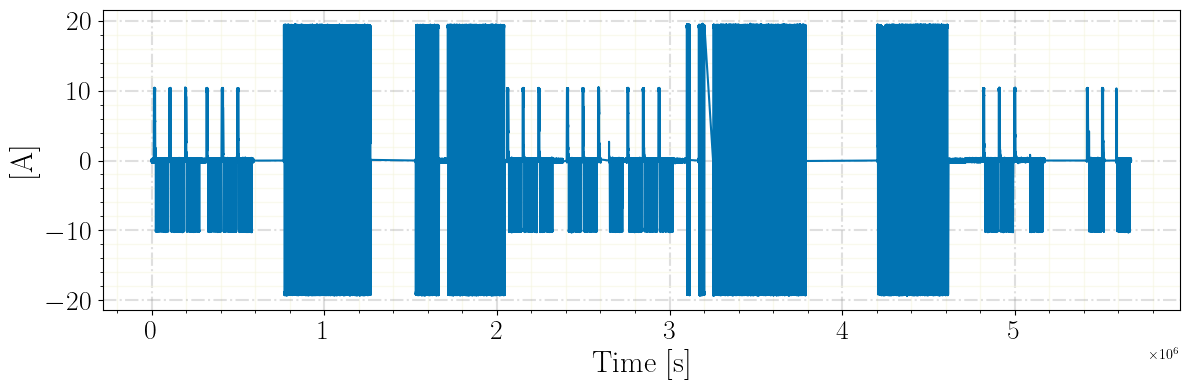

In [40]:
ernesto_plotter(**single_param)

In [21]:
df_ground

,current,voltage,temperature,t_amb,time
0,0.0135,3.431,299.679,298.247,0.0
1,0.1200,3.431,299.710,298.247,1.0
2,-0.0935,3.431,299.679,298.247,2.0
3,-0.0935,3.431,299.710,298.216,3.0
4,-0.0670,3.431,299.679,298.216,4.0
...,...,...,...,...,...
4272408,-0.0400,3.386,299.710,298.994,5672955.0
4272409,-0.0135,3.386,299.710,298.994,5672956.0
4272410,0.0400,3.386,299.710,298.963,5672957.0
4272411,0.0935,3.386,299.679,298.932,5672958.0


In [47]:
df_ground

,current,voltage,temperature,t_amb,time
0,0.0135,3.431,299.679,298.247,0.0
1,0.1200,3.431,299.710,298.247,1.0
2,-0.0935,3.431,299.679,298.247,2.0
3,-0.0935,3.431,299.710,298.216,3.0
4,-0.0670,3.431,299.679,298.216,4.0
...,...,...,...,...,...
4272408,-0.0400,3.386,299.710,298.994,5672955.0
4272409,-0.0135,3.386,299.710,298.994,5672956.0
4272410,0.0400,3.386,299.710,298.963,5672957.0
4272411,0.0935,3.386,299.679,298.932,5672958.0


In [48]:
dfs[0][['soh', 'c_max']][1864100:1864104]

,soh,c_max
1864100,0.977904,20.527619
1864101,0.977904,20.527619
1864102,0.977904,20.527619
1864103,0.977904,20.527619


In [49]:
single_plot_params = {
    'dfs': [], 
    'variables': ['soh'], 
    'x_axes': ['time'] * 5,
    'labels': [],
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['Temp [K]', 'R0 [Ohm]'],
    'markers': ['s', 's', 's', 'o'] * 5,
    'line_styles': ['-'] * 17,
    'title': 'Current',
    'save_fig': False,
    'sampling_rate': 1,
    'colors': colorblind,
    'plot_type': 'line',
    'dest': '', 
    'fig_name': '20C',
    'pic_format': 'png',
    'figsize': (18, 6),
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'legend_loc': 'upper center',
    'legend_bbox': (0.5, 1.15),
    'legend_ncol': 8
}

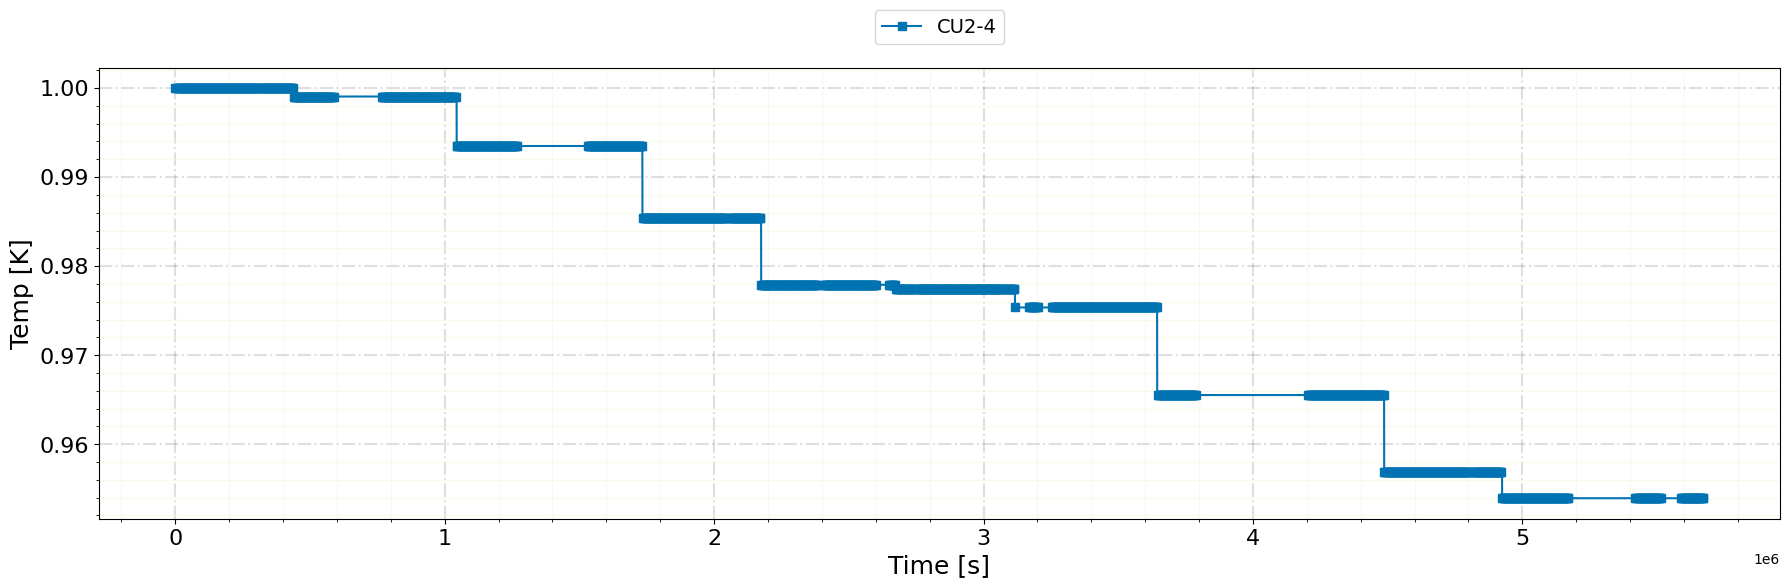

In [50]:
single_plot_params['dfs'] = [df for df in dfs]
single_plot_params['labels'] = dirs
ernesto_plotter(**single_plot_params)

### Compare SoH and Ctot

In [51]:
df_aging = pd.read_csv("../data/output/driven/paper_DT_2025/aging/results_cu2-4.csv")

In [52]:
df_aging

,timestamp,Ctot-real,soh-real,Ctot-DT,soh-DT
0,2024-07-01 17:51:37,20.991442,1.000000,20.991442,1.000000
1,2024-07-28 16:51:29,20.647376,0.983221,20.527619,0.977904
2,2024-09-05 9:40:58,20.072957,0.955867,20.024348,0.953929


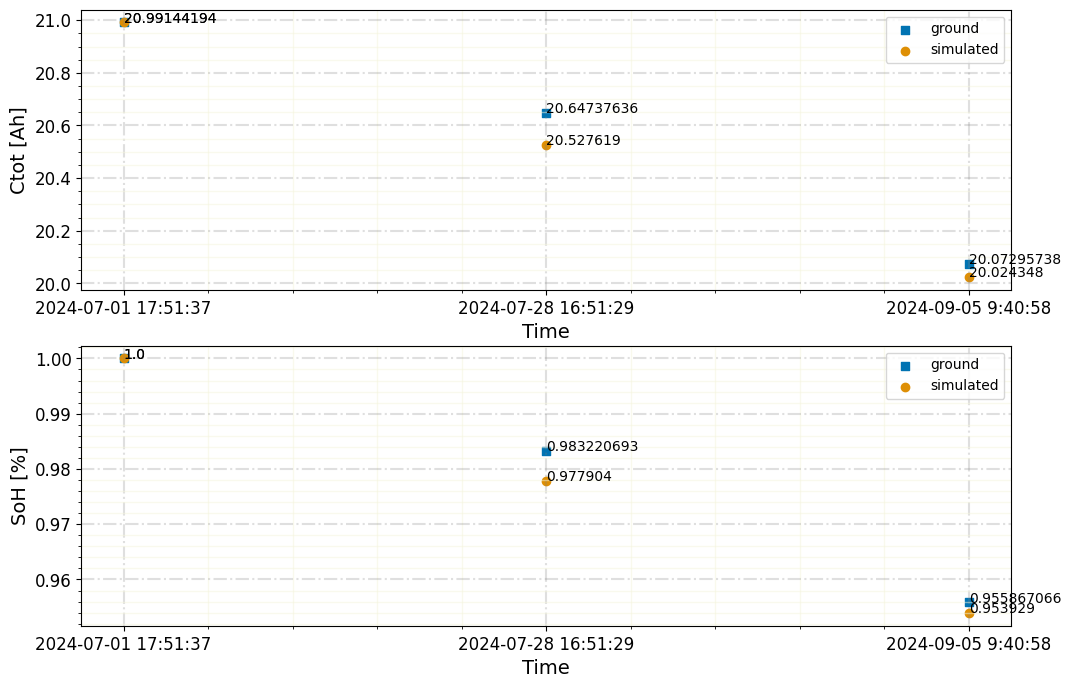

In [53]:
fig, ax = plt.subplots(2,1, figsize=(12,8))

# Command for the grid
ax[0].grid(visible=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
ax[0].minorticks_on()
ax[0].grid(visible=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)

ax[0].scatter(df_aging['timestamp'], df_aging['Ctot-real'], label='ground', color=colorblind[0], marker='s')
ax[0].scatter(df_aging['timestamp'], df_aging['Ctot-DT'], label='simulated', color=colorblind[1])
ax[0].legend()

ax[0].set_xlabel("Time", size=14)
ax[0].set_ylabel("Ctot [Ah]", size=14)
ax[0].tick_params(labelsize=12)

for i, (r, d) in enumerate(zip(df_aging['Ctot-real'], df_aging['Ctot-DT'])):
    ax[0].annotate(r, (df_aging['timestamp'][i], r)) 
    ax[0].annotate(d, (df_aging['timestamp'][i], d)) 

# Command for the grid
ax[1].grid(visible=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
ax[1].minorticks_on()
ax[1].grid(visible=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)

ax[1].scatter(df_aging['timestamp'], df_aging['soh-real'], label='ground', color=colorblind[0], marker='s')
ax[1].scatter(df_aging['timestamp'], df_aging['soh-DT'], label='simulated', color=colorblind[1])
ax[1].legend()

ax[1].set_xlabel("Time", size=14)
ax[1].set_ylabel("SoH [%]", size=14)
ax[1].tick_params(labelsize=12)

for i, (r, d) in enumerate(zip(df_aging['soh-real'], df_aging['soh-DT'])):
    ax[1].annotate(r, (df_aging['timestamp'][i], r)) 
    ax[1].annotate(d, (df_aging['timestamp'][i], d)) 